# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-11-03 22:30:53--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 58374 (57K) [text/plain]
Сохранение в: «car_data.csv»

car_data.csv        100%[===================>]  57,01K  --.-KB/s    за 0,04s   

2021-11-03 22:30:54 (1,49 MB/s) - «car_data.csv» сохранён [58374/58374]



In [67]:
import pandas as pd
import numpy as np
import scikitplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [1]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35,random_state=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [2]:
dataset2 = pd.read_csv('car_data.csv', delimiter=',', header=None)
data2 = dataset2.dropna()
data2.head(846)

0    1   2    3    4    5   6    7   8   9    10   11   12   13   14  \
0      0   95  48   83  178   72  10  162  42  20  159  176  379  184   70   
1      1   91  41   84  141   57   9  149  45  19  143  170  330  158   72   
2      2  104  50  106  209   66  10  207  32  23  158  223  635  220   73   
3      3   93  41   82  159   63   9  144  46  19  143  160  309  127   63   
4      4   85  44   70  205  103  52  149  45  19  144  241  325  188  127   
..   ...  ...  ..  ...  ...  ...  ..  ...  ..  ..  ...  ...  ...  ...  ...   
841  841   93  39   87  183   64   8  169  40  20  134  200  422  149   72   
842  842   89  46   84  163   66  11  159  43  20  159  173  368  176   72   
843  843  106  54  101  222   67  12  222  30  25  173  228  721  200   70   
844  844   86  36   78  146   58   7  135  50  18  124  155  270  148   66   
845  845   85  36   66  123   55   5  120  56  17  128  140  212  131   73   

     15  16   17   18    19  
0     6  16  187  197   van  
1     9  14  189  199   van  
2    14   9  188  196  saab  
3     6  10  199  207   van  
4     9  11  180  183   bus  
..   ..  ..  ...  ...   ...  
841   7  25  188  195  saab  
842   1  20  186  197   van  
843   3   4  187  201  saab  
844   0  25  190  195  saab  
845   1  18  186  190   van  

[846 rows x 20 columns]

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   8   9    10   11   12   13  14  15  \
0   528   95  47   73  195  70   7  167  38  20  152  184  430  185  69   9   
1   226  107  54   98  210  66  11  218  31  24  169  221  704  216  71  14   
2    31   88  42   77  151  58   8  140  47  18  142  165  293  158  64  10   
3   361  101  46  105  195  61  10  198  34  23  150  213  578  195  66   7   
4   372   97  47   87  164  64   9  156  43  20  149  173  359  182  68   1   
5   495   94  45   72  179  69   6  156  41  19  144  181  373  191  69   5   
6   285   89  48   85  189  64   8  169  39  20  153  188  427  190  64  16   
7   329   89  38   80  169  59   7  161  41  20  131  186  389  137  68   5   
8   774   94  37   72  146  60   9  133  50  18  135  161  262  128  69   2   
9   116  100  45  100  209  65   8  201  32  23  147  231  611  189  72   5   
10  809   79  38   55  120  55   5  142  48  19  128  153  295  145  81   4   
11   95   97  50  108  211  65  10  214  31  24  156  232  683  218  72   7   
12  798  103  56  100  185  59  11  216  31  24  173  219  684  219  75  15   
13  452   92  38   74  178  62   9  161  41  20  135  181  388  132  63   7   
14  731  103  52  103  170  52   7  236  28  26  160  254  816  250  82   3   

    16   17   18  
0   19  200  206  
1    0  188  197  
2   11  198  205  
3   38  192  205  
4   13  192  202  
5    5  193  198  
6    5  195  201  
7   15  192  197  
8    7  192  195  
9    5  189  195  
10   2  180  183  
11  29  188  197  
12  11  186  194  
13  29  197  206  
14  23  183  184

Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   422.792350   93.828780   44.941712   82.147541  168.945355   61.539162   
std    242.739551    8.206494    6.249107   15.949684   33.073419    7.062082   
min      1.000000   76.000000   33.000000   40.000000  110.000000   47.000000   
25%    215.000000   88.000000   40.000000   70.000000  140.000000   57.000000   
50%    416.000000   93.000000   44.000000   80.000000  167.000000   61.000000   
75%    635.000000  100.000000   50.000000   98.000000  197.000000   65.000000   
max    845.000000  119.000000   59.000000  112.000000  306.000000  126.000000   

               6           7           8           9           10         11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.00000   
mean     8.393443  169.249545   40.872495   20.612022  148.224044  188.75592   
std      3.910265   33.758611    7.857893    2.628577   14.489705   31.80751   
min      2.000000  112.000000   26.000000   17.000000  119.000000  130.00000   
25%      7.000000  146.000000   33.000000   19.000000  137.000000  167.00000   
50%      8.000000  156.000000   43.000000   20.000000  146.000000  177.00000   
75%     10.000000  200.000000   46.000000   23.000000  161.000000  217.00000   
max     52.000000  265.000000   61.000000   29.000000  186.000000  288.00000   

                12          13          14          15          16  \
count   549.000000  549.000000  549.000000  549.000000  549.000000   
mean    442.499089  175.429872   72.342441    6.156648   12.453552   
std     180.392563   33.505489    7.444885    4.811886    9.019046   
min     184.000000  109.000000   59.000000    0.000000    0.000000   
25%     318.000000  150.000000   67.000000    2.000000    5.000000   
50%     363.000000  174.000000   71.000000    5.000000   11.000000   
75%     600.000000  199.000000   75.000000    9.000000   19.000000   
max    1018.000000  268.000000  127.000000   22.000000   40.000000   

               17          18  
count  549.000000  549.000000  
mean   189.016393  195.734062  
std      6.198194    7.601764  
min    176.000000  181.000000  
25%    185.000000  190.000000  
50%    189.000000  197.000000  
75%    193.000000  201.000000  
max    204.000000  211.000000

In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

- from X_train_pd.describe() I concluded that it is necessary to make $\textbf{StandardScaler}$ so that Scaled data has zero mean and unit variation

In [13]:
### YOUR CODE HERE

scaler = StandardScaler().fit(X_train) # Scaled data has zero mean and unit variance
X_transform_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_transform_test = scaler.transform(X_test)

X_transform_train_pd = pd.DataFrame(X_transform_train)
# First 15 rows of our dataset.
X_transform_train_pd.head(15)

StandardScaler()


0         1         2         3         4         5         6   \
0   0.433813  0.142849  0.329673 -0.574048  0.788500  1.199158 -0.356680   
1  -0.811453  1.606439  1.450855  0.994811  1.242451  0.632236  0.667201   
2  -1.615516 -0.710912 -0.471171 -0.323031 -0.543086 -0.501607 -0.100710   
3  -0.254795  0.874644  0.169505  1.434091  0.788500 -0.076416  0.411231   
4  -0.209437  0.386781  0.329673  0.304513 -0.149663  0.348776  0.155261   
5   0.297741  0.020883  0.009336 -0.636802  0.304287  1.057428 -0.612650   
6  -0.568173 -0.588946  0.489842  0.179004  0.606920  0.348776 -0.100710   
7  -0.386743 -0.588946 -1.111846 -0.134768  0.001654 -0.359877 -0.356680   
8   1.448169  0.020883 -1.272015 -0.636802 -0.694403 -0.218146  0.155261   
9  -1.265027  0.752678  0.009336  1.120319  1.212187  0.490506 -0.100710   
10  1.592488 -1.808605 -1.111846 -1.703626 -1.481250 -0.926798 -0.868621   
11 -1.351619  0.386781  0.810180  1.622354  1.272714  0.490506  0.411231   
12  1.547131  1.118576  1.771193  1.120319  0.485867 -0.359877  0.667201   
13  0.120435 -0.223049 -1.111846 -0.511294  0.274024  0.065315  0.155261   
14  1.270863  1.118576  1.130517  1.308582  0.031917 -1.351990 -0.356680   

          7         8         9         10        11        12        13  \
0  -0.066697 -0.365889 -0.233046  0.260833 -0.149658 -0.069351  0.285889   
1   1.445406 -1.257525  1.290077  1.435150  1.014650  1.450943  1.211954   
2  -0.867222  0.780501 -0.994608 -0.429941 -0.747546 -0.829499 -0.520684   
3   0.852425 -0.875395  0.909297  0.122679  0.762908  0.751830  0.584620   
4  -0.392837  0.270994 -0.233046  0.053601 -0.495804 -0.463296  0.196270   
5  -0.392837  0.016241 -0.613827 -0.291786 -0.244062 -0.385617  0.465128   
6  -0.007399 -0.238512 -0.233046  0.329911 -0.023787 -0.085997  0.435255   
7  -0.244591  0.016241 -0.233046 -1.189793 -0.086723 -0.296841 -1.148018   
8  -1.074766  1.162631 -0.994608 -0.913483 -0.873417 -1.001503 -1.416876   
9   0.941372 -1.130149  0.909297 -0.084554  1.329328  0.934931  0.405381   
10 -0.807924  0.907878 -0.613827 -1.397026 -1.125160 -0.818402 -0.909034   
11  1.326810 -1.257525  1.290077  0.537143  1.360796  1.334424  1.271701   
12  1.386108 -1.257525  1.290077  1.711460  0.951714  1.339973  1.301574   
13 -0.244591  0.016241 -0.233046 -0.913483 -0.244062 -0.302389 -1.297384   
14  1.979090 -1.639655  2.051639  0.813453  2.053087  2.072378  2.227639   

          14        15        16        17        18  
0  -0.449367  0.591441  0.726509  1.773682  1.351700  
1  -0.180482  1.631482 -1.382065 -0.164132  0.166684  
2  -1.121582  0.799449 -0.161312  1.450713  1.220031  
3  -0.852696  0.175424  2.835083  0.481806  1.220031  
4  -0.583810 -1.072625  0.060643  0.481806  0.825026  
5  -0.449367 -0.240592 -0.827177  0.643290  0.298352  
6  -1.121582  2.047498 -0.827177  0.966259  0.693358  
7  -0.583810 -0.240592  0.282599  0.481806  0.166684  
8  -0.449367 -0.864617 -0.605222  0.481806 -0.096653  
9  -0.046039 -0.240592 -0.827177 -0.002647 -0.096653  
10  1.163947 -0.448601 -1.160110 -1.456007 -1.676673  
11 -0.046039  0.175424  1.836285 -0.164132  0.166684  
12  0.357290  1.839490 -0.161312 -0.487101 -0.228321  
13 -1.256025  0.175424  1.836285  1.289228  1.351700  
14  1.298390 -0.656609  1.170419 -0.971554 -1.545005

In [7]:
X_transform_train_pd.describe()

0             1             2             3             4   \
count  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02   
mean  -4.529872e-17  3.559185e-16 -3.623897e-16 -2.070799e-16  2.289203e-16   
std    1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00   
min   -1.739218e+00 -2.174502e+00 -1.912690e+00 -2.644941e+00 -1.783883e+00   
25%   -8.568107e-01 -7.109120e-01 -7.915081e-01 -7.623110e-01 -8.759830e-01   
50%   -2.800757e-02 -1.010828e-01 -1.508329e-01 -1.347675e-01 -5.887294e-02   
75%    8.750168e-01  7.526781e-01  8.101799e-01  9.948107e-01  8.490272e-01   
max    1.740931e+00  3.070029e+00  2.251699e+00  1.873372e+00  4.147731e+00   

                 5             6             7             8             9   \
count  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02   
mean   5.047571e-16 -9.625977e-17  1.294249e-16  1.488386e-16 -2.523786e-16   
std    1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00   
min   -2.060642e+00 -1.636532e+00 -1.697397e+00 -1.894408e+00 -1.375389e+00   
25%   -6.433374e-01 -3.566800e-01 -6.893278e-01 -1.002772e+00 -6.138272e-01   
50%   -7.641568e-02 -1.007096e-01 -3.928369e-01  2.709944e-01 -2.330462e-01   
75%    4.905061e-01  4.112310e-01  9.117229e-01  6.531243e-01  9.092965e-01   
max    9.136062e+00  1.116199e+01  2.838914e+00  2.563774e+00  3.193982e+00   

                 10            11            12            13            14  \
count  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02   
mean   3.947460e-16  1.229537e-16  5.824121e-17  1.358962e-16 -7.975810e-16   
std    1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00   
min   -2.018723e+00 -1.848919e+00 -1.434288e+00 -1.984465e+00 -1.793796e+00   
25%   -7.753284e-01 -6.846107e-01 -6.907859e-01 -7.596685e-01 -7.182533e-01   
50%   -1.536313e-01 -3.699328e-01 -4.411024e-01 -4.271469e-02 -1.804816e-01   
75%    8.825306e-01  8.887787e-01  8.738972e-01  7.041122e-01  3.572900e-01   
max    2.609467e+00  3.122992e+00  3.193179e+00  2.765354e+00  7.348321e+00   

                 15            16            17            18  
count  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02  
mean   3.235623e-18 -3.882747e-17 -8.315550e-16  1.164824e-16  
std    1.000912e+00  1.000912e+00  1.000912e+00  1.000912e+00  
min   -1.280634e+00 -1.382065e+00 -2.101945e+00 -1.940010e+00  
25%   -8.646171e-01 -8.271773e-01 -6.485851e-01 -7.549947e-01  
50%   -2.405924e-01 -1.613117e-01 -2.647286e-03  1.666840e-01  
75%    5.914406e-01  7.265091e-01  6.432905e-01  6.933576e-01  
max    3.295548e+00  3.057039e+00  2.419619e+00  2.010041e+00

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

* We will try to choose a hyperparameter that is responsible for regularization (how much we will fine weights), and also for the  interest, we will see which norm is better to use

In [61]:
%%time
### YOUR CODE HERE

model = LogisticRegression(max_iter = 500, multi_class = 'multinomial',solver = 'saga', tol = 1e-3 )
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(penalty = penalty,C = c_values)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
grid_search = GridSearchCV(model, grid, scoring = 'accuracy', cv = cv, error_score = 0)
grid_result = grid_search.fit(X_transform_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.784545 using {'C': 10, 'penalty': 'l1'}
0.782727 (0.026175) with: {'C': 100, 'penalty': 'l2'}
0.781818 (0.024730) with: {'C': 100, 'penalty': 'l1'}
0.783636 (0.027813) with: {'C': 10, 'penalty': 'l2'}
0.784545 (0.028182) with: {'C': 10, 'penalty': 'l1'}
0.771818 (0.033881) with: {'C': 1.0, 'penalty': 'l2'}
0.778182 (0.032064) with: {'C': 1.0, 'penalty': 'l1'}
0.749091 (0.031544) with: {'C': 0.1, 'penalty': 'l2'}
0.700909 (0.033636) with: {'C': 0.1, 'penalty': 'l1'}
0.666364 (0.047246) with: {'C': 0.01, 'penalty': 'l2'}
0.263636 (0.000000) with: {'C': 0.01, 'penalty': 'l1'}
CPU times: user 7.89 s, sys: 58 ms, total: 7.95 s
Wall time: 8.23 s


* As you can see, the grid coped best with hyperparameters: C = 100/10; and the grid could not decide on the best value of "penalty", l2 and l1 cope the same way.

ROC curve on test data

accuracy:  0.797979797979798
   f1:     0.7953478842265083


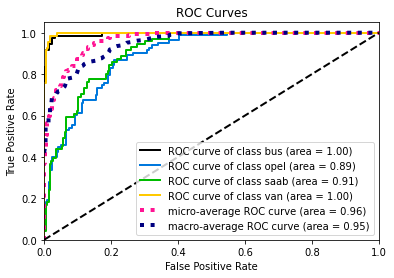

CPU times: user 398 ms, sys: 44.4 ms, total: 442 ms
Wall time: 461 ms


In [62]:
%%time

model = LogisticRegression(max_iter=500, multi_class='multinomial',solver='saga', tol=1e-3, C = 100, penalty='l2')
model.fit(X_transform_train, y_train)
y_pred = model.predict(X_transform_test)
print("accuracy: ", accuracy_score(y_test, y_pred))
print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

y_pred = model.predict_proba(X_transform_test) # gives the probability for each class classified in ascending order
scikitplot.metrics.plot_roc(y_test, y_pred)
plt.show()

In [136]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

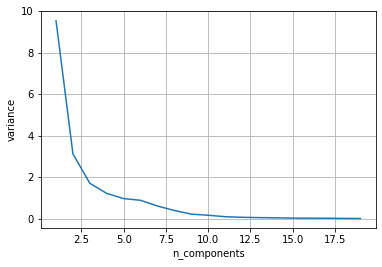

In [10]:
pca = PCA(n_components=19)
X_train_PCA = pca.fit(X_transform_train)
plt.plot(np.arange(1,20),pca.explained_variance_)
plt.xlabel("n_components") 
plt.ylabel("variance") 
plt.grid()
plt.show()

* Here we can observe that at k~14, the PCA method saves us enough information for further transformations.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [81]:
pca = PCA(n_components=14)
pca.fit(X_transform_train)
X_train_PCA = pca.transform(X_transform_train)
X_test_PCA = pca.transform(X_transform_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [82]:
%%time
### YOUR CODE HERE

model = LogisticRegression(max_iter = 1000, multi_class = 'multinomial',solver = 'saga', tol = 1e-3 )
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(C = c_values)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
grid_search = GridSearchCV(model, grid, scoring = 'accuracy', cv = cv, error_score = 0)
grid_result = grid_search.fit(X_train_PCA, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.754545 using {'C': 1.0}
0.752727 (0.042407) with: {'C': 100}
0.751818 (0.043608) with: {'C': 10}
0.754545 (0.041858) with: {'C': 1.0}
0.741818 (0.031805) with: {'C': 0.1}
0.660909 (0.037714) with: {'C': 0.01}
CPU times: user 1.69 s, sys: 7.2 ms, total: 1.69 s
Wall time: 1.7 s


* it can be noticed that the result does not depend much on the hyperparameter C (for further calculations, take C = 100)

accuracy:  0.7508417508417509
   f1   :  0.7489566282811831


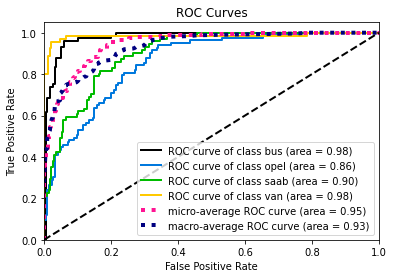

CPU times: user 336 ms, sys: 25 ms, total: 361 ms
Wall time: 379 ms


In [83]:
%%time

model = LogisticRegression(max_iter=1000, multi_class='multinomial',solver='saga', tol=1e-3, C =100)
model.fit(X_train_PCA, y_train)
y_pred = model.predict(X_test_PCA)
print("accuracy: ", accuracy_score(y_test, y_pred))
print("   f1   : ", f1_score(y_test, y_pred, average = "weighted"))

y_pred = model.predict_proba(X_test_PCA)
scikitplot.metrics.plot_roc(y_test, y_pred)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [24]:
%%time

clf = DecisionTreeClassifier()
max_depth = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,30,40,100]

grid = dict(max_depth=max_depth)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
grid_search = GridSearchCV(clf, grid, scoring = 'accuracy', cv = cv, error_score = 0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.693636 using {'max_depth': 100}
0.410000 (0.010325) with: {'max_depth': 1}
0.547273 (0.031175) with: {'max_depth': 2}
0.662727 (0.020103) with: {'max_depth': 3}
0.669091 (0.040696) with: {'max_depth': 4}
0.684545 (0.034027) with: {'max_depth': 5}
0.680000 (0.039375) with: {'max_depth': 6}
0.670909 (0.039585) with: {'max_depth': 7}
0.680000 (0.032727) with: {'max_depth': 8}
0.676364 (0.032575) with: {'max_depth': 9}
0.689091 (0.034689) with: {'max_depth': 10}
0.684545 (0.034510) with: {'max_depth': 12}
0.679091 (0.041868) with: {'max_depth': 14}
0.681818 (0.027574) with: {'max_depth': 16}
0.680909 (0.031870) with: {'max_depth': 18}
0.686364 (0.030492) with: {'max_depth': 20}
0.681818 (0.047932) with: {'max_depth': 30}
0.690909 (0.023706) with: {'max_depth': 40}
0.693636 (0.025078) with: {'max_depth': 100}
CPU times: user 740 ms, sys: 10.9 ms, total: 751 ms
Wall time: 762 ms


* After several runs of the top cell, we can conclude that it makes no sense to make a tree with a depth greater than 10.


$$\newline$$
(Note: the tree works much faster than the previous methods)

accuracy:  0.7037037037037037
   f1:     0.7086714962719087


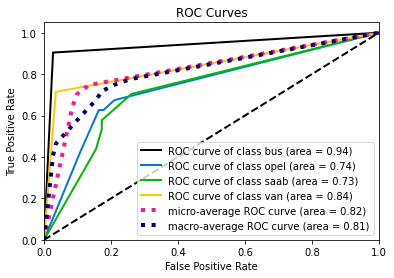

In [30]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))
print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

y_pred = clf.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, y_pred)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [39]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=10))
n_estimators = np.linspace(2,97,num = 20,dtype=int) # [2,7,12,...,97]

grid = dict(n_estimators=n_estimators)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.760000 using {'n_estimators': 17}
0.674545 (0.040206) with: {'n_estimators': 2}
0.716364 (0.038095) with: {'n_estimators': 7}
0.734545 (0.030909) with: {'n_estimators': 12}
0.760000 (0.038398) with: {'n_estimators': 17}
0.757273 (0.035221) with: {'n_estimators': 22}
0.750909 (0.029654) with: {'n_estimators': 27}
0.752727 (0.028977) with: {'n_estimators': 32}
0.749091 (0.024461) with: {'n_estimators': 37}
0.749091 (0.026722) with: {'n_estimators': 42}
0.750000 (0.017838) with: {'n_estimators': 47}
0.751818 (0.028182) with: {'n_estimators': 52}
0.757273 (0.023724) with: {'n_estimators': 57}
0.745455 (0.022636) with: {'n_estimators': 62}
0.748182 (0.024410) with: {'n_estimators': 67}
0.757273 (0.024747) with: {'n_estimators': 72}
0.750000 (0.027946) with: {'n_estimators': 77}
0.753636 (0.027409) with: {'n_estimators': 82}
0.759091 (0.032077) with: {'n_estimators': 87}
0.756364 (0.016664) with: {'n_estimators': 92}
0.752727 (0.022926) with: {'n_estimators': 97}


In [40]:
plt.plot(n_estimators,means)
plt.title("dependence of n_estimators on accuracy ") 
plt.xlabel("n_estimators") 
plt.ylabel("means") 
plt.show()

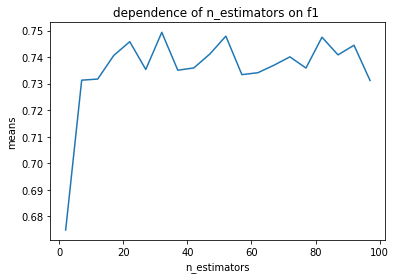

In [41]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
means = grid_result.cv_results_['mean_test_score']
plt.plot(n_estimators,means)
plt.title("dependence of n_estimators on f1 ") 
plt.xlabel("n_estimators") 
plt.ylabel("means") 
plt.show()

* From the graphs above, we can conclude that the optimal number of ensembles is ~ 20, because after this value, the model apparently begins to retrain and with more ensembles, as you can see, the metrics begin to fall.

* I think the optimal parameter found in paragraph 2.5 can be used here. why not? so we will have better trees in bagging.and Bagging is more stable and does not retrain as a decision tree

In [42]:
model_2 = BaggingClassifier(base_estimator = LogisticRegression(max_iter=500, multi_class='multinomial',solver='saga', tol=1e-3, C = 100, penalty='l2'))
n_estimators = np.linspace(2,97,num = 20,dtype=int) # [2,7,12,...,97]

grid_search_2 = GridSearchCV(estimator = model_2, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy',error_score = 0)
grid_result_2 = grid_search.fit(X_transform_train, y_train)

print("Best: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_))
means_2 = grid_result_2.cv_results_['mean_test_score']
stds_2 = grid_result_2.cv_results_['std_test_score']
params_2 = grid_result_2.cv_results_['params']
for mean, stdev, param in zip(means_2, stds_2, params_2):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.745547 using {'n_estimators': 77}
0.661360 (0.052975) with: {'n_estimators': 2}
0.686187 (0.032750) with: {'n_estimators': 7}
0.723992 (0.026355) with: {'n_estimators': 12}
0.719978 (0.033863) with: {'n_estimators': 17}
0.729297 (0.024419) with: {'n_estimators': 22}
0.742086 (0.031347) with: {'n_estimators': 27}
0.731493 (0.029305) with: {'n_estimators': 32}
0.729863 (0.031795) with: {'n_estimators': 37}
0.724118 (0.027090) with: {'n_estimators': 42}
0.730290 (0.041706) with: {'n_estimators': 47}
0.733752 (0.024229) with: {'n_estimators': 52}
0.716234 (0.036403) with: {'n_estimators': 57}
0.736338 (0.029476) with: {'n_estimators': 62}
0.724926 (0.037171) with: {'n_estimators': 67}
0.723858 (0.032761) with: {'n_estimators': 72}
0.745547 (0.032968) with: {'n_estimators': 77}
0.726690 (0.037185) with: {'n_estimators': 82}
0.734940 (0.035051) with: {'n_estimators': 87}
0.715033 (0.036126) with: {'n_estimators': 92}
0.729612 (0.028158) with: {'n_estimators': 97}


In [43]:
plt.plot(n_estimators,means_2)
plt.title("dependence of n_estimators on accuracy ") 
plt.xlabel("n_estimators") 
plt.ylabel("means") 
plt.show()

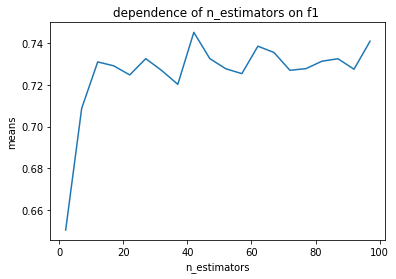

In [44]:
grid_search_2 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result_2 = grid_search.fit(X_train, y_train)
means_2 = grid_result.cv_results_['mean_test_score']
plt.plot(n_estimators,means_2)
plt.title("dependence of n_estimators on f1 ") 
plt.xlabel("n_estimators") 
plt.ylabel("means") 
plt.show()

In [45]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=10), n_estimators = 20)
model.fit(X_transform_train, y_train)
y_pred = model.predict_proba(X_transform_test)
scikitplot.metrics.plot_roc(y_test, y_pred)
plt.show()

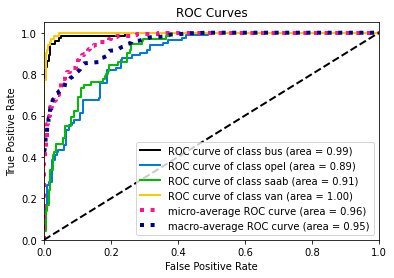

In [46]:
model = BaggingClassifier(base_estimator = LogisticRegression(max_iter=500, multi_class='multinomial',solver='saga', tol=1e-3, C = 100, penalty='l2'), n_estimators = 20)
model.fit(X_transform_train, y_train)
y_pred = model.predict_proba(X_transform_test)
scikitplot.metrics.plot_roc(y_test, y_pred)
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [49]:
# YOUR CODE HERE

model = RandomForestClassifier()
n_estimators = np.linspace(1,300,num = 31,dtype=int) # [1,10,20,...,300]

grid = dict(n_estimators=n_estimators)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.764545 using {'n_estimators': 130}
0.624545 (0.058217) with: {'n_estimators': 1}
0.737273 (0.023160) with: {'n_estimators': 10}
0.736364 (0.036815) with: {'n_estimators': 20}
0.750000 (0.024138) with: {'n_estimators': 30}
0.751818 (0.025078) with: {'n_estimators': 40}
0.749091 (0.023070) with: {'n_estimators': 50}
0.752727 (0.023983) with: {'n_estimators': 60}
0.743636 (0.022563) with: {'n_estimators': 70}
0.749091 (0.029091) with: {'n_estimators': 80}
0.753636 (0.031347) with: {'n_estimators': 90}
0.753636 (0.031870) with: {'n_estimators': 100}
0.746364 (0.035314) with: {'n_estimators': 110}
0.749091 (0.030478) with: {'n_estimators': 120}
0.764545 (0.020909) with: {'n_estimators': 130}
0.754545 (0.024730) with: {'n_estimators': 140}
0.749091 (0.027029) with: {'n_estimators': 150}
0.757273 (0.033291) with: {'n_estimators': 160}
0.741818 (0.023070) with: {'n_estimators': 170}
0.759091 (0.029945) with: {'n_estimators': 180}
0.752727 (0.030096) with: {'n_estimators': 190}
0.756364

In [50]:
plt.plot(n_estimators,means)
plt.title("dependence of n_estimators on accuracy ") 
plt.xlabel("n_estimators") 
plt.ylabel("means") 
plt.show()

Best: 0.749342 using {'n_estimators': 210}


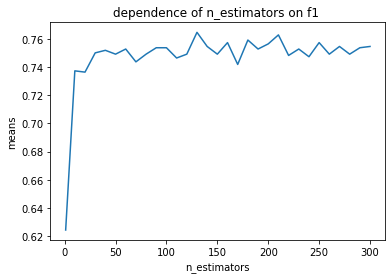

In [51]:
grid_search_2 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search_2.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
plt.plot(n_estimators,means)
plt.title("dependence of n_estimators on f1 ") 
plt.xlabel("n_estimators") 
plt.ylabel("means") 
plt.show()

It can be seen from the graphs that it is best to take p_e stimulants ~ 40-50
we got different results for Bagging and for Random Forest, due to the fact that a Random Forest is not just packed trees, it has randomness in the selection of features of each tree.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

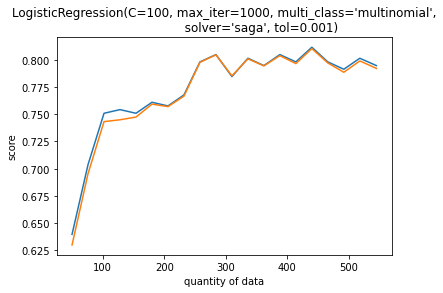

In [56]:
# YOUR CODE HERE
a = np.linspace(50, 545, num=20, dtype=int)
score_accuracy = np.array([])
score_f1 = np.array([])
for i in a:
    model = LogisticRegression(max_iter=1000, multi_class='multinomial',solver='saga', tol=1e-3, C = 100, penalty='l2')
    model.fit(X_transform_train[:i], y_train[:i])
    y_pred = model.predict(X_transform_test)
    score_accuracy = np.append(score_accuracy, accuracy_score(y_test, y_pred))
    score_f1 = np.append(score_f1, f1_score(y_test, y_pred, average = "weighted"))
    
    
plt.plot(a,score_accuracy)
plt.plot(a,score_f1)
plt.title(model) 
plt.xlabel("quantity of data") 
plt.ylabel("score") 
plt.show()


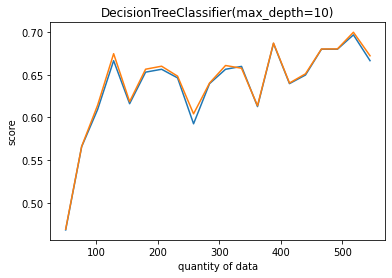

In [57]:
score_accuracy = np.array([])
score_f1 = np.array([])
for i in a:
    clf = DecisionTreeClassifier(max_depth=10)
    clf.fit(X_train[:i], y_train[:i]) 
    y_pred = clf.predict(X_test)
    
    score_accuracy = np.append(score_accuracy, accuracy_score(y_test, y_pred))
    score_f1 = np.append(score_f1, f1_score(y_test, y_pred, average = "weighted"))
        
plt.plot(a,score_accuracy)
plt.plot(a,score_f1)
plt.title(clf) 
plt.xlabel("quantity of data") 
plt.ylabel("score") 
plt.show()



In [58]:
from sklearn.ensemble import RandomForestClassifier
score_accuracy = np.array([])
score_f1 = np.array([])
for i in a:
    model = RandomForestClassifier(n_estimators = 50)
    model.fit(X_train[:i], y_train[:i]) 
    y_pred = model.predict(X_test)
    score_accuracy = np.append(score_accuracy, accuracy_score(y_test, y_pred))
    score_f1 = np.append(score_f1, f1_score(y_test, y_pred, average = "weighted"))
        
plt.plot(a,score_accuracy)
plt.plot(a,score_f1)
plt.title(model) 
plt.xlabel("quantity of data") 
plt.ylabel("score") 
plt.show()

Explanation of the above graphs:
apparently due to the fact that the train division goes in this way (in a stupid way), I think that due to the fact that my sample is not balanced and some class may dominate in number over another, we get a lower score on the test data. And trees tend to retrain and the imbalance of classes aggravates this, so there are such ups and downs 